In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML
pd.options.display.float_format = '{:.5f}'.format
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
sns.set()


# Data Preprocessing

In [2]:
data=pd.read_csv("train_titanic.csv")
pd.set_option('display.max_columns', 1000)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.25000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.28330,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.92500,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.10000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.05000,NaN,S
5,6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.45830,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.86250,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.07500,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.13330,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.07080,NaN,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.00000,891.00000,891.00000,891,891,714.00000,891.00000,891.00000,891,891.00000,204,889
unique,nan,nan,nan,891,2,nan,nan,nan,681,nan,147,3
top,nan,nan,nan,"White, Mr. Percival Wayland",male,nan,nan,nan,CA. 2343,nan,G6,S
freq,nan,nan,nan,1,577,nan,nan,nan,7,nan,4,644
mean,446.00000,0.38384,2.30864,NaN,NaN,29.69912,0.52301,0.38159,NaN,32.20421,NaN,NaN
std,257.35384,0.48659,0.83607,NaN,NaN,14.52650,1.10274,0.80606,NaN,49.69343,NaN,NaN
min,1.00000,0.00000,1.00000,NaN,NaN,0.42000,0.00000,0.00000,NaN,0.00000,NaN,NaN
25%,223.50000,0.00000,2.00000,NaN,NaN,20.12500,0.00000,0.00000,NaN,7.91040,NaN,NaN
50%,446.00000,0.00000,3.00000,NaN,NaN,28.00000,0.00000,0.00000,NaN,14.45420,NaN,NaN
75%,668.50000,1.00000,3.00000,NaN,NaN,38.00000,1.00000,0.00000,NaN,31.00000,NaN,NaN


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
sex_dict={"Sex":{"female":0,"male":1}}
data=data.replace(sex_dict)

Generate new feature called **Title**

In [7]:
data['Title']=data.apply(lambda row: row["Name"].split('.')[0].split(',')[1].strip(), axis=1)

In [8]:
data["Embarked"]=data["Embarked"].fillna(value="S")


In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [10]:
data=data.drop(["Cabin","Ticket","Name"],axis=1)

In [11]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,1,22.00000,1,0,7.25000,S,Mr
1,2,1,1,0,38.00000,1,0,71.28330,C,Mrs
2,3,1,3,0,26.00000,0,0,7.92500,S,Miss
3,4,1,1,0,35.00000,1,0,53.10000,S,Mrs
4,5,0,3,1,35.00000,0,0,8.05000,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.00000,0,0,13.00000,S,Rev
887,888,1,1,0,19.00000,0,0,30.00000,S,Miss
888,889,0,3,0,nan,1,2,23.45000,S,Miss
889,890,1,1,1,26.00000,0,0,30.00000,C,Mr


In [12]:
enc = OneHotEncoder(drop='first')
one_hot=enc.fit_transform(data[['Title']])
d=pd.DataFrame(one_hot.toarray(),columns=enc.get_feature_names(['f']))
data1=data.drop(["Title"],axis=1).join(d)
data1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,f_Col,f_Don,f_Dr,f_Jonkheer,f_Lady,f_Major,f_Master,f_Miss,f_Mlle,f_Mme,f_Mr,f_Mrs,f_Ms,f_Rev,f_Sir,f_the Countess
0,1,0,3,1,22.00000,1,0,7.25000,S,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,2,1,1,0,38.00000,1,0,71.28330,C,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
2,3,1,3,0,26.00000,0,0,7.92500,S,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,4,1,1,0,35.00000,1,0,53.10000,S,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
4,5,0,3,1,35.00000,0,0,8.05000,S,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.00000,0,0,13.00000,S,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
887,888,1,1,0,19.00000,0,0,30.00000,S,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
888,889,0,3,0,nan,1,2,23.45000,S,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
889,890,1,1,1,26.00000,0,0,30.00000,C,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [13]:
enc = OneHotEncoder(drop='first')
one_hot=enc.fit_transform(data1[['Embarked']])
d=pd.DataFrame(one_hot.toarray(),columns=enc.get_feature_names(['f']))
data2=data1.drop(["Embarked"],axis=1).join(d)
data2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,f_Col,f_Don,f_Dr,f_Jonkheer,f_Lady,f_Major,f_Master,f_Miss,f_Mlle,f_Mme,f_Mr,f_Mrs,f_Ms,f_Rev,f_Sir,f_the Countess,f_Q,f_S
0,1,0,3,1,22.00000,1,0,7.25000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
1,2,1,1,0,38.00000,1,0,71.28330,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,3,1,3,0,26.00000,0,0,7.92500,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
3,4,1,1,0,35.00000,1,0,53.10000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
4,5,0,3,1,35.00000,0,0,8.05000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.00000,0,0,13.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
887,888,1,1,0,19.00000,0,0,30.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
888,889,0,3,0,nan,1,2,23.45000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
889,890,1,1,1,26.00000,0,0,30.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [14]:
data2.isna().sum()

PassengerId         0
Survived            0
Pclass              0
Sex                 0
Age               177
SibSp               0
Parch               0
Fare                0
f_Col               0
f_Don               0
f_Dr                0
f_Jonkheer          0
f_Lady              0
f_Major             0
f_Master            0
f_Miss              0
f_Mlle              0
f_Mme               0
f_Mr                0
f_Mrs               0
f_Ms                0
f_Rev               0
f_Sir               0
f_the Countess      0
f_Q                 0
f_S                 0
dtype: int64

In [15]:
imp = IterativeImputer(max_iter=10, random_state=0)
data3=pd.DataFrame(imp.fit_transform(data2),columns=data2.columns)

In [16]:
data3[data2["Age"].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,f_Col,f_Don,f_Dr,f_Jonkheer,f_Lady,f_Major,f_Master,f_Miss,f_Mlle,f_Mme,f_Mr,f_Mrs,f_Ms,f_Rev,f_Sir,f_the Countess,f_Q,f_S
5,6.00000,0.00000,3.00000,1.00000,34.53399,0.00000,0.00000,8.45830,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
17,18.00000,1.00000,2.00000,1.00000,32.58977,0.00000,0.00000,13.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
19,20.00000,1.00000,3.00000,0.00000,29.44443,0.00000,0.00000,7.22500,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
26,27.00000,0.00000,3.00000,1.00000,28.50460,0.00000,0.00000,7.22500,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
28,29.00000,1.00000,3.00000,0.00000,21.89292,0.00000,0.00000,7.87920,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860.00000,0.00000,3.00000,1.00000,28.00838,0.00000,0.00000,7.22920,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
863,864.00000,0.00000,3.00000,0.00000,-0.32164,8.00000,2.00000,69.55000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
868,869.00000,0.00000,3.00000,1.00000,29.37258,0.00000,0.00000,9.50000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
878,879.00000,0.00000,3.00000,1.00000,29.37465,0.00000,0.00000,7.89580,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000


In [17]:
data3[data3["Age"]<0]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,f_Col,f_Don,f_Dr,f_Jonkheer,f_Lady,f_Major,f_Master,f_Miss,f_Mlle,f_Mme,f_Mr,f_Mrs,f_Ms,f_Rev,f_Sir,f_the Countess,f_Q,f_S
159,160.00000,0.00000,3.00000,1.00000,-9.52404,8.00000,2.00000,69.55000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
792,793.00000,0.00000,3.00000,0.00000,-0.27935,8.00000,2.00000,69.55000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
863,864.00000,0.00000,3.00000,0.00000,-0.32164,8.00000,2.00000,69.55000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000


In [18]:
data3["Age"]=np.abs(data3["Age"])

Generate a new feature called **Generation**

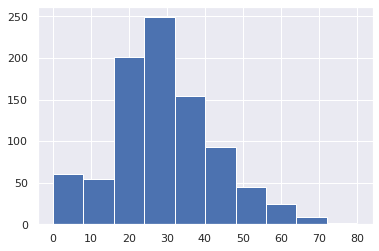

In [19]:
data3['Age'].hist()

In [20]:
def generation(age):
    if age < 25:
        return 'young'
    elif age < 50:
        return 'adult'
    else:
        return 'old'
data3['Generation']=data3['Age'].apply(generation)

In [21]:
data3

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,f_Col,f_Don,f_Dr,f_Jonkheer,f_Lady,f_Major,f_Master,f_Miss,f_Mlle,f_Mme,f_Mr,f_Mrs,f_Ms,f_Rev,f_Sir,f_the Countess,f_Q,f_S,Generation
0,1.00000,0.00000,3.00000,1.00000,22.00000,1.00000,0.00000,7.25000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,young
1,2.00000,1.00000,1.00000,0.00000,38.00000,1.00000,0.00000,71.28330,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,adult
2,3.00000,1.00000,3.00000,0.00000,26.00000,0.00000,0.00000,7.92500,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,adult
3,4.00000,1.00000,1.00000,0.00000,35.00000,1.00000,0.00000,53.10000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,adult
4,5.00000,0.00000,3.00000,1.00000,35.00000,0.00000,0.00000,8.05000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.00000,0.00000,2.00000,1.00000,27.00000,0.00000,0.00000,13.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,adult
887,888.00000,1.00000,1.00000,0.00000,19.00000,0.00000,0.00000,30.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,young
888,889.00000,0.00000,3.00000,0.00000,17.13806,1.00000,2.00000,23.45000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,young
889,890.00000,1.00000,1.00000,1.00000,26.00000,0.00000,0.00000,30.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,adult


In [22]:
enc = OneHotEncoder(drop='first')
one_hot=enc.fit_transform(data3[['Generation']])
d=pd.DataFrame(one_hot.toarray(),columns=enc.get_feature_names(['f']))
data3=data3.drop(["Generation"],axis=1).join(d)
data3

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,f_Col,f_Don,f_Dr,f_Jonkheer,f_Lady,f_Major,f_Master,f_Miss,f_Mlle,f_Mme,f_Mr,f_Mrs,f_Ms,f_Rev,f_Sir,f_the Countess,f_Q,f_S,f_old,f_young
0,1.00000,0.00000,3.00000,1.00000,22.00000,1.00000,0.00000,7.25000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000
1,2.00000,1.00000,1.00000,0.00000,38.00000,1.00000,0.00000,71.28330,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,3.00000,1.00000,3.00000,0.00000,26.00000,0.00000,0.00000,7.92500,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
3,4.00000,1.00000,1.00000,0.00000,35.00000,1.00000,0.00000,53.10000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
4,5.00000,0.00000,3.00000,1.00000,35.00000,0.00000,0.00000,8.05000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.00000,0.00000,2.00000,1.00000,27.00000,0.00000,0.00000,13.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
887,888.00000,1.00000,1.00000,0.00000,19.00000,0.00000,0.00000,30.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000
888,889.00000,0.00000,3.00000,0.00000,17.13806,1.00000,2.00000,23.45000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000
889,890.00000,1.00000,1.00000,1.00000,26.00000,0.00000,0.00000,30.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [23]:
data3.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Fare              0
f_Col             0
f_Don             0
f_Dr              0
f_Jonkheer        0
f_Lady            0
f_Major           0
f_Master          0
f_Miss            0
f_Mlle            0
f_Mme             0
f_Mr              0
f_Mrs             0
f_Ms              0
f_Rev             0
f_Sir             0
f_the Countess    0
f_Q               0
f_S               0
f_old             0
f_young           0
dtype: int64

In [24]:
data3.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,f_Col,f_Don,f_Dr,f_Jonkheer,f_Lady,f_Major,f_Master,f_Miss,f_Mlle,f_Mme,f_Mr,f_Mrs,f_Ms,f_Rev,f_Sir,f_the Countess,f_Q,f_S,f_old,f_young
count,891.00000,891.00000,891.00000,891.00000,891.00000,891.00000,891.00000,891.00000,891.00000,891.00000,891.00000,891.00000,891.00000,891.00000,891.00000,891.00000,891.00000,891.00000,891.00000,891.00000,891.00000,891.00000,891.00000,891.00000,891.00000,891.00000,891.00000,891.00000
mean,446.00000,0.38384,2.30864,0.64759,29.58052,0.52301,0.38159,32.20421,0.00224,0.00112,0.00786,0.00112,0.00112,0.00224,0.04489,0.20426,0.00224,0.00112,0.58025,0.14029,0.00112,0.00673,0.00112,0.00112,0.08642,0.72503,0.08305,0.35690
std,257.35384,0.48659,0.83607,0.47799,13.63391,1.10274,0.80606,49.69343,0.04735,0.03350,0.08834,0.03350,0.03350,0.04735,0.20719,0.40339,0.04735,0.03350,0.49380,0.34748,0.03350,0.08183,0.03350,0.03350,0.28114,0.44675,0.27612,0.47935
min,1.00000,0.00000,1.00000,0.00000,0.08520,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,223.50000,0.00000,2.00000,0.00000,21.00000,0.00000,0.00000,7.91040,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,446.00000,0.00000,3.00000,1.00000,29.00000,0.00000,0.00000,14.45420,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
75%,668.50000,1.00000,3.00000,1.00000,36.85105,1.00000,0.00000,31.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000
max,891.00000,1.00000,3.00000,1.00000,80.00000,8.00000,6.00000,512.32920,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


# Feature selection

In [25]:
X=data3.drop(["PassengerId","Survived"],axis=1)
Y=data3["Survived"]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

# Dealing with outliers using sklearn RobustScaler

In [26]:
num_feats=["Pclass","Sex","Age","SibSp","Parch","Fare"]

In [27]:
def simple_multiplot(data,ncols,plottype):
       
    nrows=int(data.shape[1]/ncols)+1
    cols=data.columns
    fig, axs = plt.subplots(nrows, ncols, constrained_layout=False)
    fig.set_figheight(ncols*20)
    fig.set_figwidth(15)
    
    for f in range(data.shape[1]):
        plt.subplot(nrows,ncols,f+1)
        plottype(data[cols[f]])
        plt.title(cols[f])
        
    plt.tight_layout()
    plt.show()

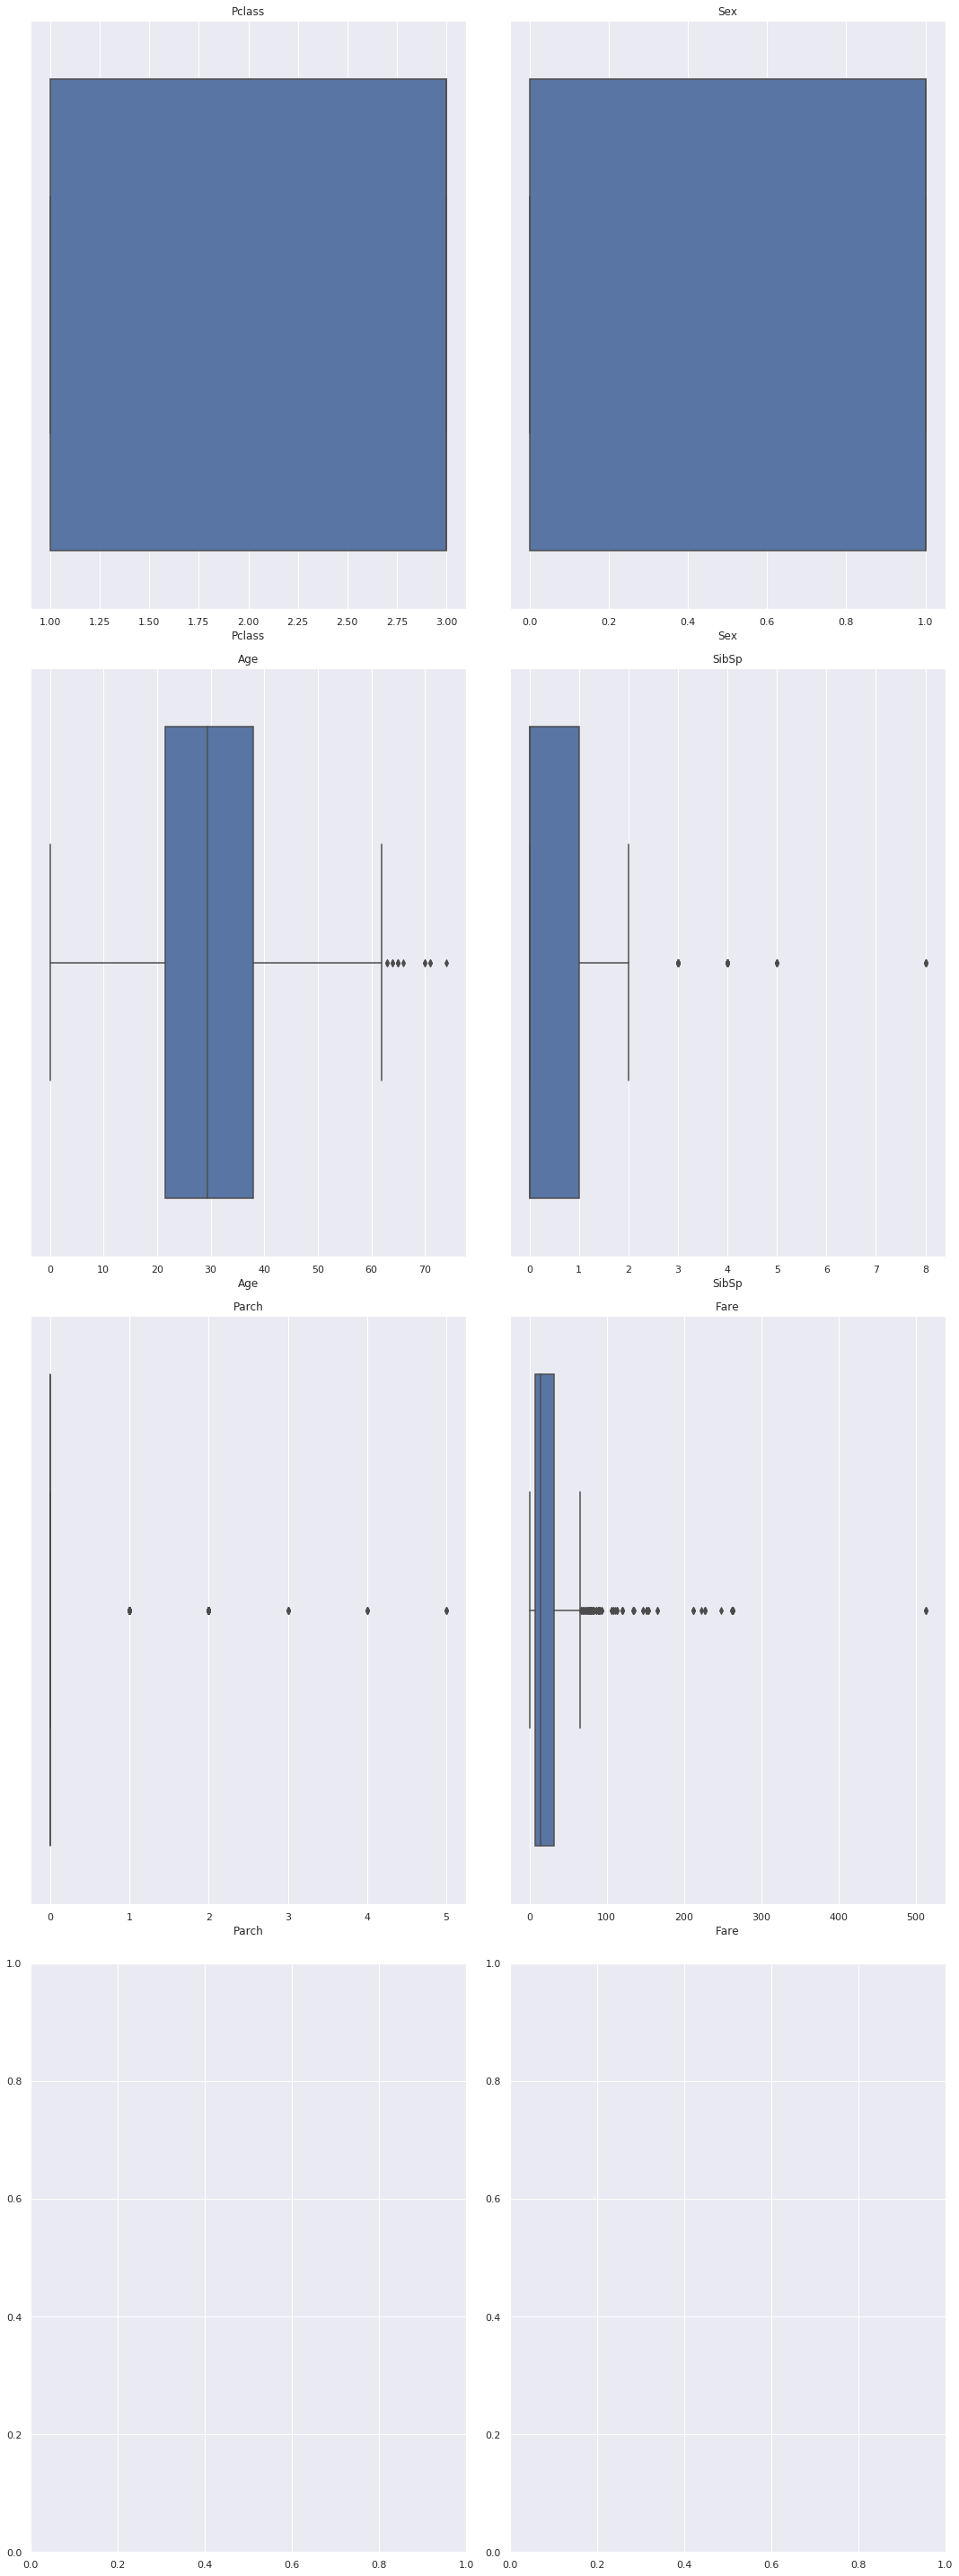

In [28]:
simple_multiplot(x_train[num_feats],2,sns.boxplot)

## Standardize the dataset

In [29]:
x_train[num_feats].describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,712.00000,712.00000,712.00000,712.00000,712.00000,712.00000
mean,2.28652,0.65590,30.02297,0.53371,0.37500,33.27181
std,0.84490,0.47541,13.73146,1.10056,0.79101,52.52311
min,1.00000,0.00000,0.08520,0.00000,0.00000,0.00000
25%,1.00000,0.00000,21.51444,0.00000,0.00000,7.92500
50%,3.00000,1.00000,29.43468,0.00000,0.00000,14.45830
75%,3.00000,1.00000,38.00000,1.00000,0.00000,31.27500
max,3.00000,1.00000,74.00000,8.00000,5.00000,512.32920


In [30]:
scaler=RobustScaler()
scaler.fit(x_train[num_feats])
x_train[num_feats]=scaler.transform(x_train[num_feats])
x_test[num_feats]=scaler.transform(x_test[num_feats])

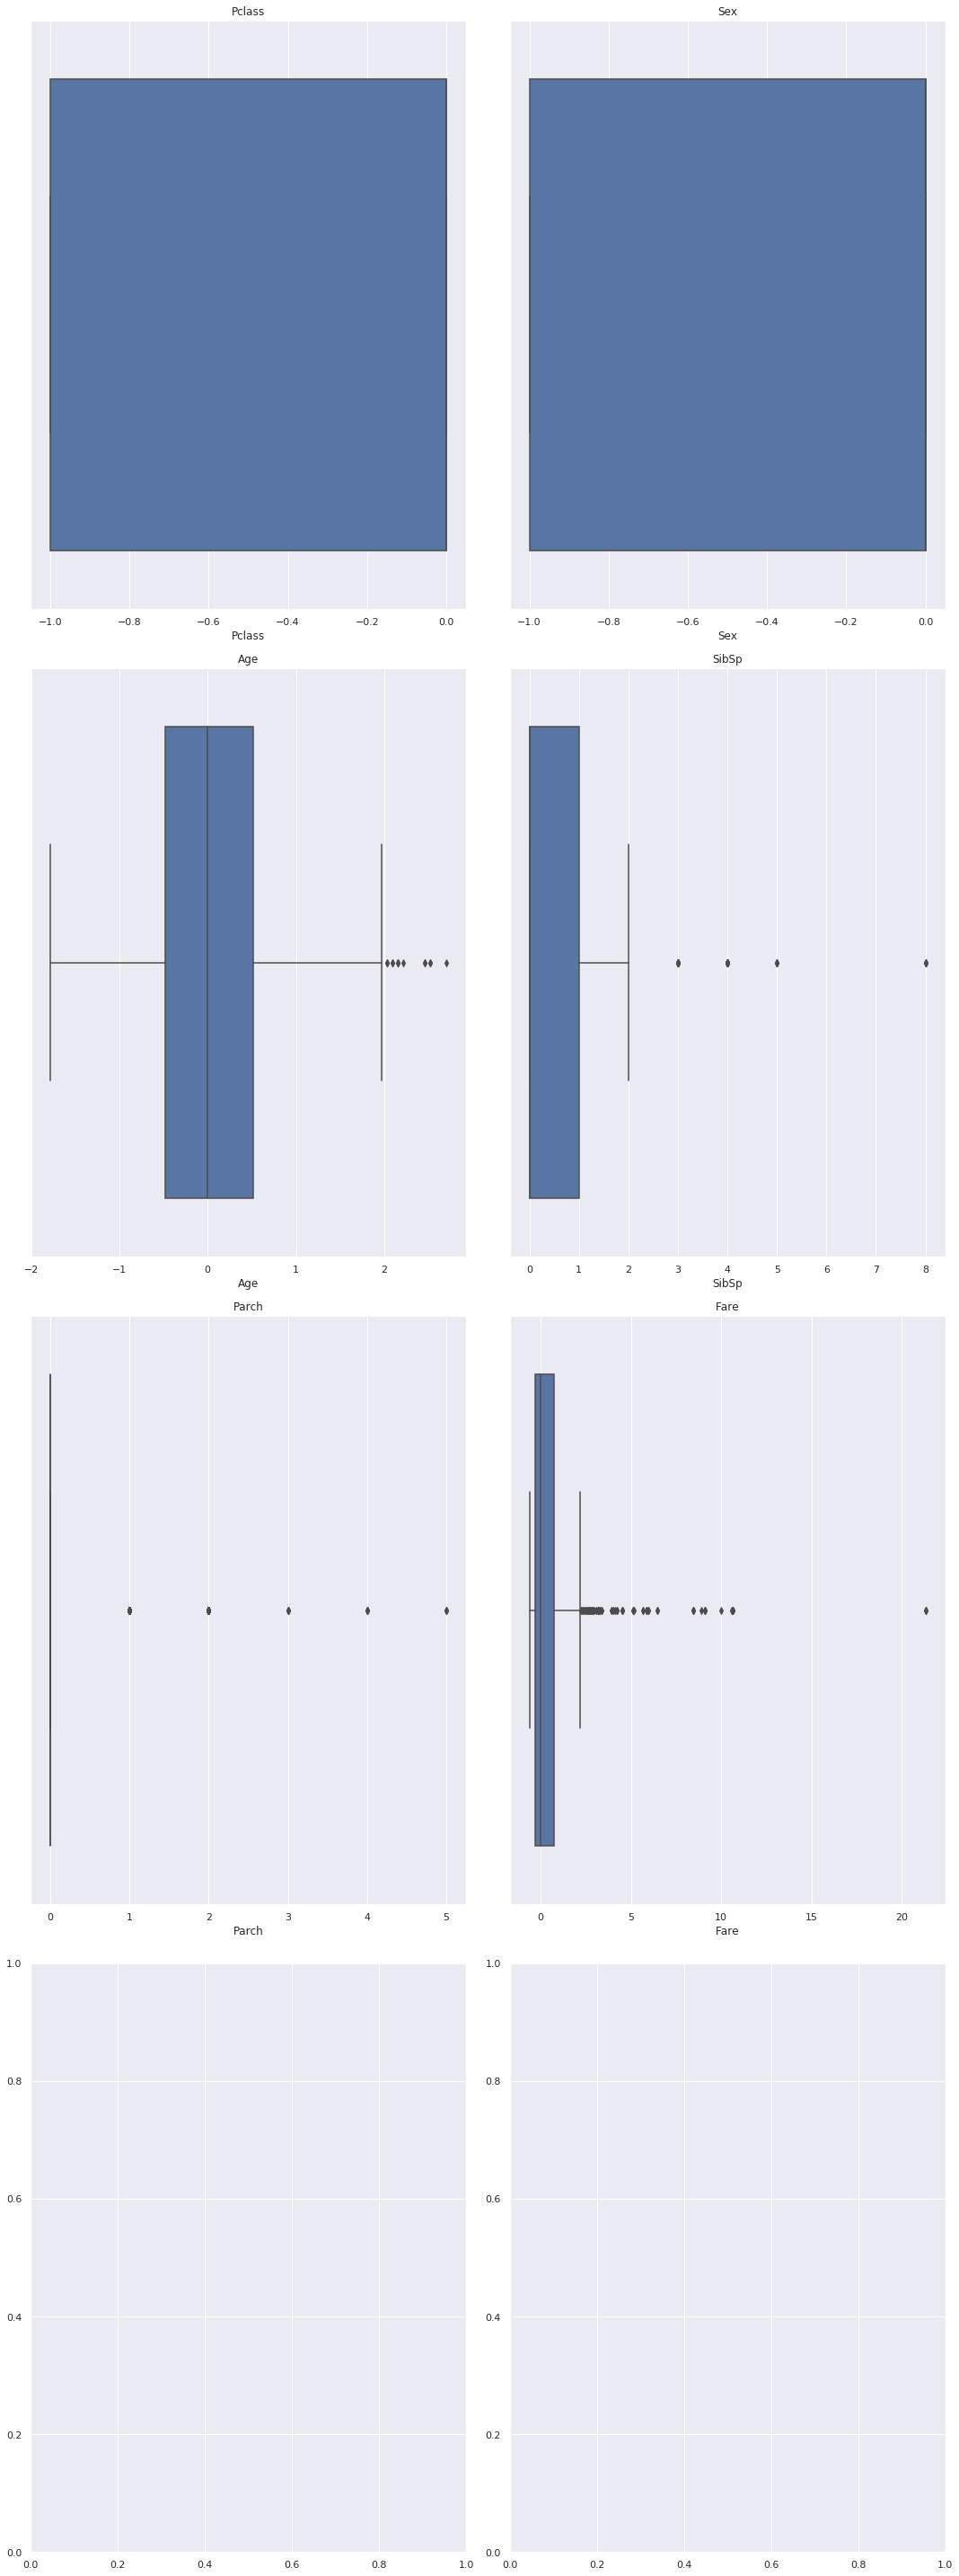

In [31]:
simple_multiplot(x_train[num_feats],2,sns.boxplot)

# Feature Selection

In [32]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )

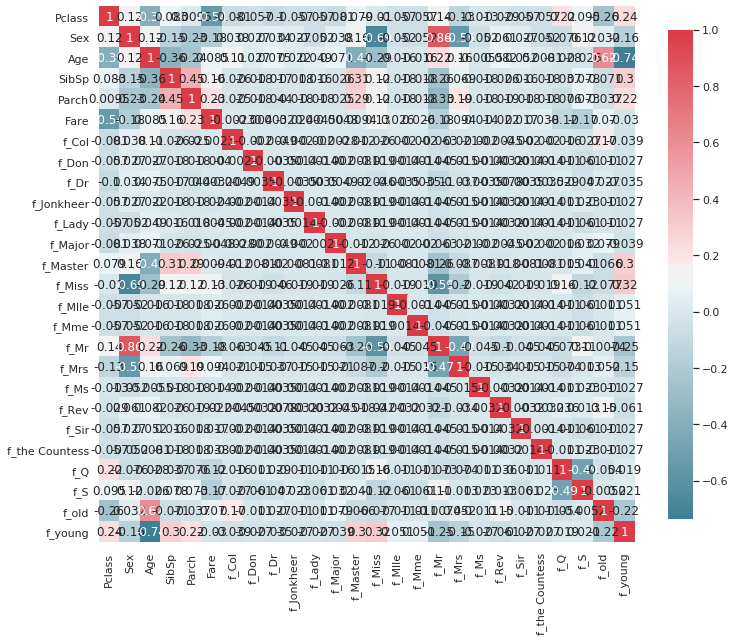

In [33]:
plot_correlation_map(x_train)

In [34]:
all_feats=x_train.columns.to_list()

print(all_feats)

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'f_Col', 'f_Don', 'f_Dr', 'f_Jonkheer', 'f_Lady', 'f_Major', 'f_Master', 'f_Miss', 'f_Mlle', 'f_Mme', 'f_Mr', 'f_Mrs', 'f_Ms', 'f_Rev', 'f_Sir', 'f_the Countess', 'f_Q', 'f_S', 'f_old', 'f_young']


In [35]:
def simple_multiregplot(data,y,ncols):
      
    nrows=int(data.shape[1]/ncols)+1
    cols=data.columns
    fig, axs = plt.subplots(nrows, ncols, constrained_layout=False)
    
    fig.set_figheight(ncols*20)
    fig.set_figwidth(15)
    
    for f in range(data.shape[1]):
        if cols[f] != y :
            plt.subplot(nrows,ncols,f+1)
            
            sns.regplot(x=cols[f],y=y,data=data[[y,cols[f]]],logistic=True)
            
        
    plt.tight_layout()
    plt.show()

# Features selection

I will try to select significant features acording to the F-Statistic Test using sklearn.feature_selection.RFE (backward feature selection) and sklearn.feature_selection.f_regression functions

stop conditions = when all selected features have their F-statistics >1 and corresponding p-values <=0.05


In [36]:
def select_feature_F(data,target):
    F,P_F=f_regression(data,target)
    
    cols=pd.DataFrame(np.array(data.columns),columns=['Xi'])
    F=pd.DataFrame(np.array(F),columns=['F Statistic'])
    P_F=pd.DataFrame(np.array(P_F),columns=['P-values {Prob(F Statistic)}'])
   
    df=pd.concat([cols,F,P_F], axis=1)
    
    
    return df.sort_values(by='F Statistic',ascending=False).reset_index(drop=True)

select_feature_F(x_train,y_train)

,Xi,F Statistic,P-values {Prob(F Statistic)}
0,f_Mr,298.47180,0.00000
1,Sex,289.44205,0.00000
2,Pclass,93.97642,0.00000
3,f_Mrs,87.07034,0.00000
4,f_Miss,85.88520,0.00000
5,Fare,53.72926,0.00000
6,f_S,15.82610,0.00008
7,f_Master,6.88775,0.00887
8,Age,4.64188,0.03154
9,f_young,4.47707,0.03470


In [37]:
n_feat=len(all_feats)
sel_feats=None
estimator=LogisticRegression()
for n in range(n_feat,1,-1):
    selector = RFE(estimator, n,step=1)
    selector = selector.fit(x_train, y_train)
    feats=[x_train.columns[i] for i,x in enumerate(selector.support_) if x==True]
    df=select_feature_F(x_train[feats],y_train)
    if (df[df['P-values {Prob(F Statistic)}']>0.05].shape[0]==0) and (df[df['F Statistic']<=1].shape[0]==0):
        n_feat=n
        sel_feats=df
        break
sel_feats

,Xi,F Statistic,P-values {Prob(F Statistic)}
0,Sex,289.44205,0.00000
1,Pclass,93.97642,0.00000
2,f_Master,6.88775,0.00887


In [38]:
sel_feats_names=sel_feats.Xi.to_list()
x_train=x_train[sel_feats_names]
x_test=x_test[sel_feats_names]
x_train.head()

,Sex,Pclass,f_Master
408,0.00000,0.00000,0.00000
480,0.00000,0.00000,1.00000
510,0.00000,0.00000,0.00000
609,-1.00000,-1.00000,0.00000
547,0.00000,-0.50000,0.00000



### Testing No multicolinearity
I will use the Variance influance factor to test non multicolinearity.
I will use statsmodels.stats.outliers_influence.variance_inflation_factor to test it

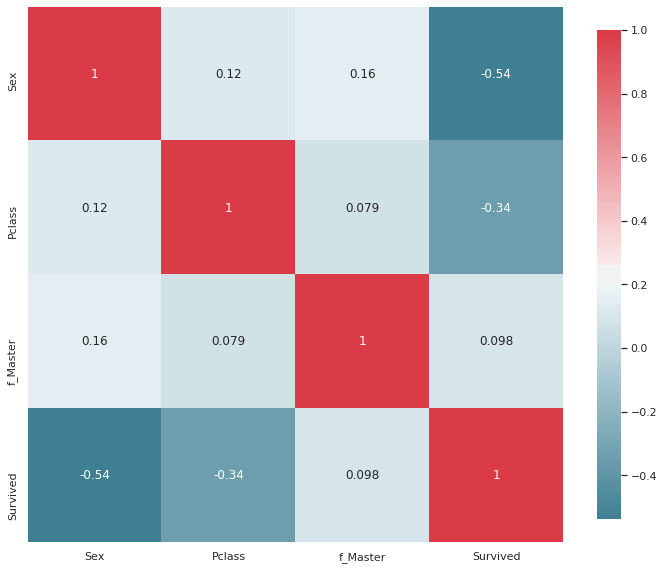

In [39]:
plot_correlation_map(x_train.join(y_train))

In [40]:
VIF=pd.DataFrame()
VIF['feature']=sel_feats_names
VIF['VIF']=[variance_inflation_factor(x_train.values, i) for i in range(len(sel_feats_names))]

VIF

,feature,VIF
0,Sex,1.26288
1,Pclass,1.27059
2,f_Master,1.00771


A we can see VIF factor is very close to 1, so we can assume that there is no multicolinearity in selected features.


## Calculating Logistic Regression Model

In [41]:
model=LogisticRegression(random_state=0).fit(x_train, y_train)

In [42]:
y_hat=model.predict(x_test)

In [43]:
y_train_prob = model.predict_proba(x_train)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob)
def find_best_threshold(threshould, fpr, tpr):
   t = threshould[np.argmax(tpr*(1-fpr))]
   # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
   print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
   return t
best_thres=find_best_threshold(thresholds, fpr, tpr)

the maximum value of tpr*(1-fpr) 0.6146782813617809 for threshold 0.432


In [44]:
print("Mean Training Accuracy = {:.2f}".format(model.score(x_train,y_train)))

Mean Training Accuracy = 0.80


### Validating using Test data

In [45]:
print("Mean Testing Accuracy = {:.2f}".format(model.score(x_test,y_test)))

Mean Testing Accuracy = 0.80


In [46]:
y_pred_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

Calculate Manual Confusion Matrix at given threshold

In [47]:
def predict(x,thres):
    if x > thres:
        return 1
    else:
        return 0
    
pred=[predict(x,best_thres) for x in y_pred_prob ]

result=pd.DataFrame(metrics.confusion_matrix(y_test,pred),columns=['Prdicted Survived','Prdicted Dead'],index=["Actual Survived","Actual Dead"])
result

,Prdicted Survived,Prdicted Dead
Actual Survived,88,16
Actual Dead,20,55


Sklearn Confusion Matrix (is the same as manually calculated with given threshold)

In [48]:
pd.DataFrame(metrics.confusion_matrix(y_test,y_hat),columns=['Prdicted Survived','Prdicted Dead'],index=["Actual Survived","Actual Dead"])

,Prdicted Survived,Prdicted Dead
Actual Survived,88,16
Actual Dead,20,55


In [49]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       104
         1.0       0.77      0.73      0.75        75

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



The **ROC** (Receiver Operator Characteristic) curve is a popular graphic for simultaneously displaying the two types of errors for all possible thresholds. In fact, varying the classifier threshold changes its true positive and false positive rate
The overall performance of a classifier, summarized over all possible thresholds, is given by the area under the (ROC) curve (AUC)
The ideal ROC curve hugs the top left corner, indicating a high true positive rate and a low false positive rate. The dotted line represents the “no information” classifier (the proportion of correctly classified is the same as the proportion of incorrectly classified);

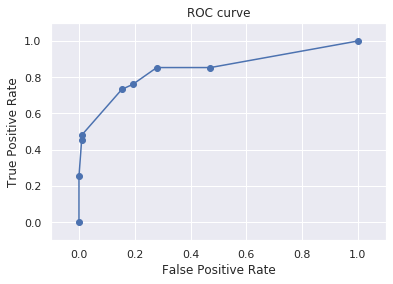

In [50]:
plt.plot(fpr, tpr, '-o')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [51]:
print("Performance of the logistic classifier = {:.2f}".format(metrics.roc_auc_score(y_test, y_pred_prob)))

Performance of the logistic classifier = 0.84


(0, 1)

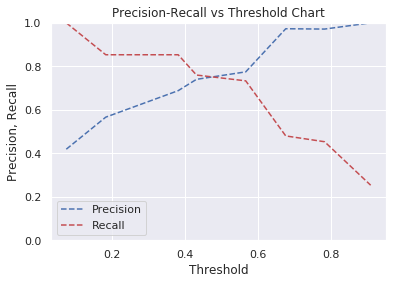

In [52]:
### Predict test_y values and probabilities based on fitted logistic regression model

pred_y=model.predict(x_test) 

probs_y=model.predict_proba(x_test) 
  # probs_y is a 2-D array of probability of being labeled as 0 (first column of    array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:,1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

As threshold increase, precision ( TP/(TP+FP)) increase but Recall decrease ( TP/(TP+FN) sometimes it's called sensivity). 

**I think** that a **general** good choice of a threshold is at intersection of the two curves where we got precision equal recall.
So using Test data, we can confirm that best **general** threshold is arround given threshold.

## Feature Selection using Lasso Regression

I will try an-other feature selection method : **Lasso Regression**. Then we will repeate the same steps as before

In [53]:
X=data3.drop(["PassengerId","Survived"],axis=1)
Y=data3["Survived"]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

In [54]:
scaler=RobustScaler()
scaler.fit(x_train[num_feats])
x_train[num_feats]=scaler.transform(x_train[num_feats])
x_test[num_feats]=scaler.transform(x_test[num_feats])

In Lasso Regression **alpha** is hyper-parameter that must be specified. So I will try multiples values in order to pick a best value

In [55]:
from sklearn.linear_model import Lasso,LassoCV

n_alphas = 200
alphas = np.linspace(0.001, 10, n_alphas)
alphas

array([1.00000000e-03, 5.12462312e-02, 1.01492462e-01, 1.51738693e-01,
       2.01984925e-01, 2.52231156e-01, 3.02477387e-01, 3.52723618e-01,
       4.02969849e-01, 4.53216080e-01, 5.03462312e-01, 5.53708543e-01,
       6.03954774e-01, 6.54201005e-01, 7.04447236e-01, 7.54693467e-01,
       8.04939698e-01, 8.55185930e-01, 9.05432161e-01, 9.55678392e-01,
       1.00592462e+00, 1.05617085e+00, 1.10641709e+00, 1.15666332e+00,
       1.20690955e+00, 1.25715578e+00, 1.30740201e+00, 1.35764824e+00,
       1.40789447e+00, 1.45814070e+00, 1.50838693e+00, 1.55863317e+00,
       1.60887940e+00, 1.65912563e+00, 1.70937186e+00, 1.75961809e+00,
       1.80986432e+00, 1.86011055e+00, 1.91035678e+00, 1.96060302e+00,
       2.01084925e+00, 2.06109548e+00, 2.11134171e+00, 2.16158794e+00,
       2.21183417e+00, 2.26208040e+00, 2.31232663e+00, 2.36257286e+00,
       2.41281910e+00, 2.46306533e+00, 2.51331156e+00, 2.56355779e+00,
       2.61380402e+00, 2.66405025e+00, 2.71429648e+00, 2.76454271e+00,
      

In [56]:
lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(x_train, y_train)

LassoCV(alphas=array([1.00000000e-03, 5.12462312e-02, 1.01492462e-01, 1.51738693e-01,
       2.01984925e-01, 2.52231156e-01, 3.02477387e-01, 3.52723618e-01,
       4.02969849e-01, 4.53216080e-01, 5.03462312e-01, 5.53708543e-01,
       6.03954774e-01, 6.54201005e-01, 7.04447236e-01, 7.54693467e-01,
       8.04939698e-01, 8.55185930e-01, 9.05432161e-01, 9.55678392e-01,
       1.00592462e+00, 1.05617085e+0...
       9.44729146e+00, 9.49753769e+00, 9.54778392e+00, 9.59803015e+00,
       9.64827638e+00, 9.69852261e+00, 9.74876884e+00, 9.79901508e+00,
       9.84926131e+00, 9.89950754e+00, 9.94975377e+00, 1.00000000e+01]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=17, selection='cyclic', tol=0.0001,
        verbose=False)

In [57]:
lasso_cv.alpha_

0.001

In [58]:
lasso_cv.coef_

array([-0.33612906, -0.51002578, -0.10162884, -0.06728152, -0.05541536,
        0.0120196 ,  0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.49268745, -0.        , -0.        ,
       -0.        , -0.00587971,  0.10063952,  0.        , -0.03067897,
        0.        ,  0.        , -0.        , -0.04251273,  0.00878935,
       -0.0394221 ])

In [59]:
sel_feats=[x for i,x in enumerate(x_train.columns) if lasso_cv.coef_[i]!=0]
sel_feats

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'f_Master',
 'f_Mr',
 'f_Mrs',
 'f_Rev',
 'f_S',
 'f_old',
 'f_young']

In [60]:
VIF=pd.DataFrame()
VIF['feature']=sel_feats
VIF['VIF']=[variance_inflation_factor(x_train[sel_feats].values, i) for i in range(len(sel_feats))]

VIF

,feature,VIF
0,Pclass,2.96549
1,Sex,3.72234
2,Age,5.83970
3,SibSp,1.78893
4,Parch,1.77604
5,Fare,1.84387
6,f_Master,1.73522
7,f_Mr,3.54919
8,f_Mrs,1.95183
9,f_Rev,1.05990


A we can see that almost VIF factor is <= 5 


In [61]:
x_train=x_train[sel_feats]
x_test=x_test[sel_feats]
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,f_Master,f_Mr,f_Mrs,f_Rev,f_S,f_old,f_young
408,0.00000,0.00000,-0.51164,0.00000,0.00000,-0.28622,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000
480,0.00000,0.00000,-1.23955,5.00000,2.00000,1.38937,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000
510,0.00000,0.00000,-0.02637,0.00000,0.00000,-0.28729,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
609,-1.00000,-1.00000,0.64088,0.00000,0.00000,5.95307,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
547,-0.50000,0.00000,0.08821,0.00000,0.00000,-0.02552,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [62]:
model=LogisticRegression(random_state=0).fit(x_train, y_train)

In [63]:
y_hat=model.predict(x_test)

In [64]:
y_train_prob = model.predict_proba(x_train)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob)
def find_best_threshold(threshould, fpr, tpr):
   t = threshould[np.argmax(tpr*(1-fpr))]
   # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
   print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
   return t
best_thres=find_best_threshold(thresholds, fpr, tpr)

the maximum value of tpr*(1-fpr) 0.6815974414004966 for threshold 0.404


In [65]:
print("Mean Training Accuracy = {:.2f}".format(model.score(x_train,y_train)))

Mean Training Accuracy = 0.83


### Validating using Test data

In [66]:
print("Mean Testing Accuracy = {:.2f}".format(model.score(x_test,y_test)))

Mean Testing Accuracy = 0.83


In [67]:
y_pred_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

Calculate Manual Confusion Matrix at given threshold 

In [68]:
def predict(x,thres):
    if x > thres:
        return 1
    else:
        return 0
    
pred=[predict(x,best_thres) for x in y_pred_prob ]

result=pd.DataFrame(metrics.confusion_matrix(y_test,pred),columns=['Prdicted Survived','Prdicted Dead'],index=["Actual Survived","Actual Dead"])
result

,Prdicted Survived,Prdicted Dead
Actual Survived,90,14
Actual Dead,15,60


Sklearn Confusion Matrix is different from the manually calculated with given threshold)

In [69]:
pd.DataFrame(metrics.confusion_matrix(y_test,y_hat),columns=['Prdicted Survived','Prdicted Dead'],index=["Actual Survived","Actual Dead"])

,Prdicted Survived,Prdicted Dead
Actual Survived,92,12
Actual Dead,18,57


In [70]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       104
         1.0       0.83      0.76      0.79        75

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179



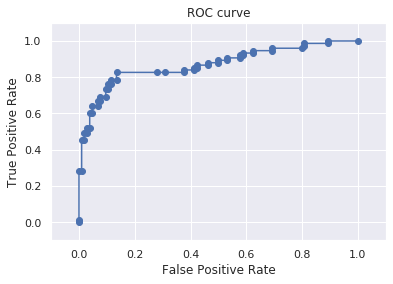

In [71]:
plt.plot(fpr, tpr, '-o')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [72]:
print("Performance of the logistic classifier = {:.2f}".format(metrics.roc_auc_score(y_test, y_pred_prob)))

Performance of the logistic classifier = 0.87


(0, 1)

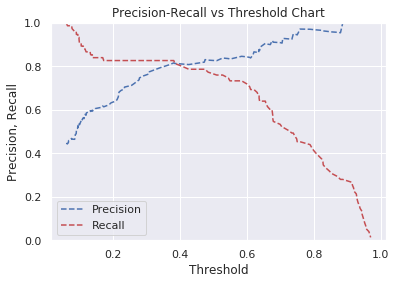

In [73]:
### Predict test_y values and probabilities based on fitted logistic regression model

pred_y=model.predict(x_test) 

probs_y=model.predict_proba(x_test) 
  # probs_y is a 2-D array of probability of being labeled as 0 (first column of    array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 
1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

We can see that the new model is more complex than the previous one with only 3 features but their performances are pretty equals => the first model seem to be a better choice